In [6]:
data = pd.read_csv('oral_cancer_prediction_dataset.csv')

In [7]:
data.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [8]:
data.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
84917    False
84918    False
84919    False
84920    False
84921    False
Length: 84922, dtype: bool

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)

In [12]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [13]:
data.head()

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,South Africa,68,Male,No,No,No,No,No,Yes,High,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [14]:
## Encode categorical features
le = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [15]:
data.head()

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,6,36,0,1,1,1,0,0,1,1,...,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,7,64,1,1,1,1,0,1,1,0,...,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,15,37,0,0,1,0,0,1,1,2,...,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,13,55,1,1,1,0,1,0,1,2,...,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,12,68,1,0,0,0,0,0,1,0,...,0,0,2.834789,3,1,44.293199,45354.75,52,0,1


In [16]:
# Step 5: Define X (features) and y (target)
X = data.drop([ 'Survival Rate (5-Year, %)'], axis=1)
y = data['Survival Rate (5-Year, %)']


In [17]:
# Check the column names in the dataset
print("Columns in the dataset:", data.columns)

# Verify and correct the target column name
target_column = 'Survival Rate (5-Year, %)'  # Replace with the correct column name if necessary
if target_column in data.columns:
    y = data[target_column]
    X = data.drop([target_column], axis=1)
else:
    raise KeyError(f"The column '{target_column}' is not found in the dataset. Please check the column names.")

Columns in the dataset: Index(['Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)


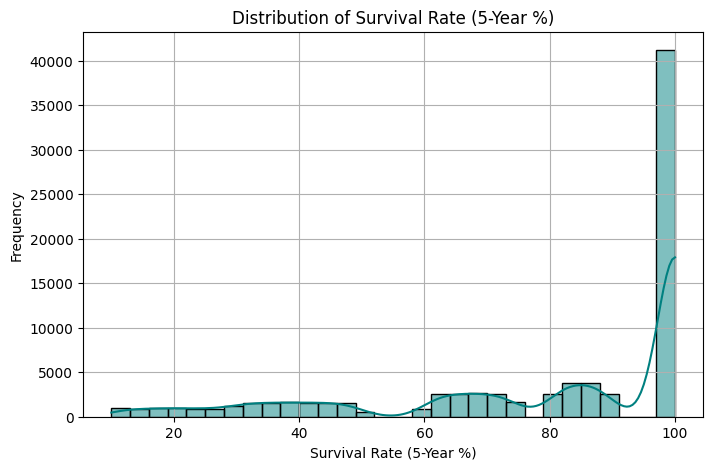

In [19]:
# Step 7.1: Visualize distribution of survival rate
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='teal')
plt.title('Distribution of Survival Rate (5-Year %)')
plt.xlabel('Survival Rate (5-Year %)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


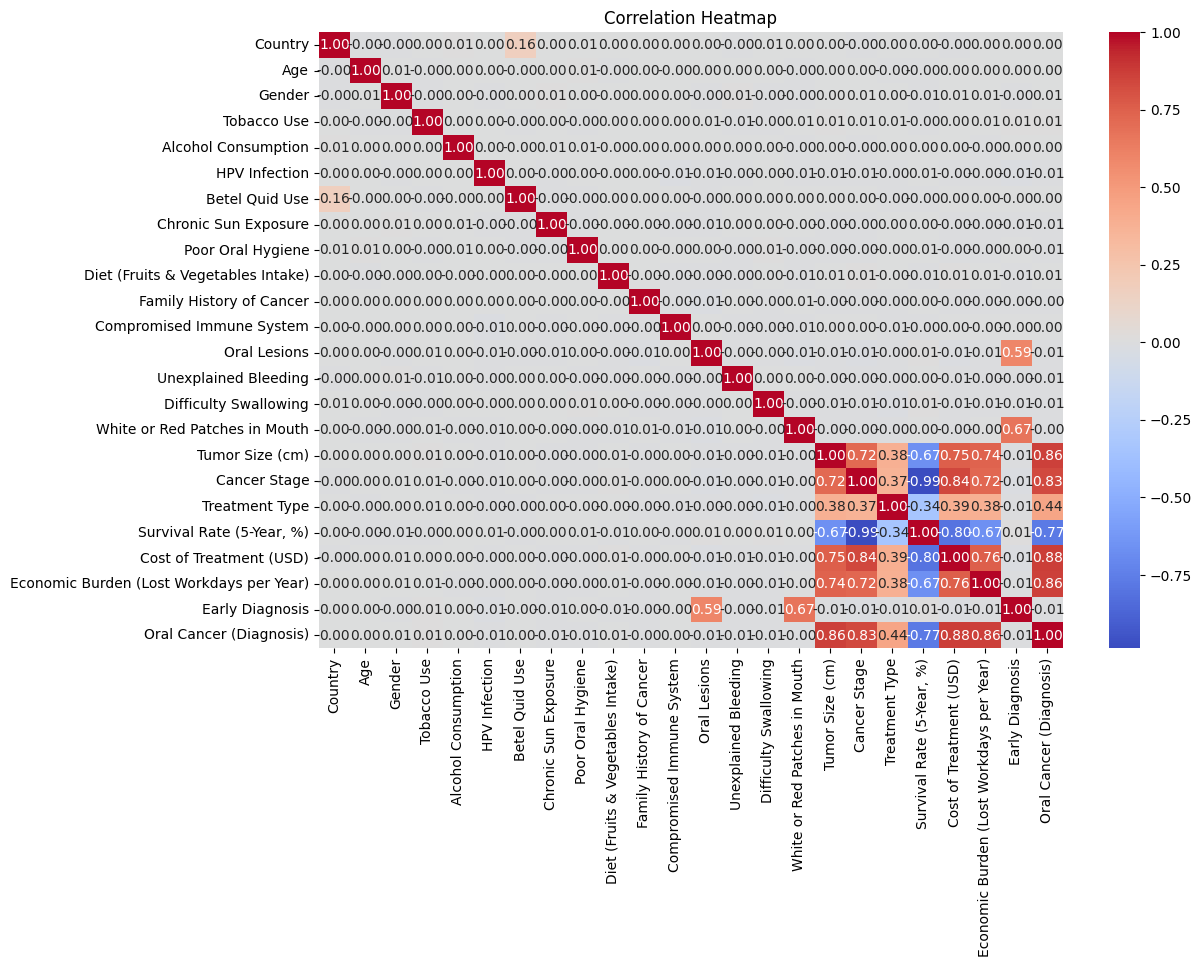

In [20]:
# Step 7.2: Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 9: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, random_state=42,
                          subsample=0.8)

In [24]:
# 🧠 Model Training
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [25]:
# Step 10: Predict and evaluate the model using accuracy score
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# Convert predictions to the same scale for accuracy calculation
y_train_rounded = np.round(y_train).astype(int)
y_test_rounded = np.round(y_test).astype(int)
y_pred_train_rounded = np.round(y_pred_train).astype(int)
y_pred_test_rounded = np.round(y_pred_test).astype(int)

# Calculate accuracy
train_acc = accuracy_score(y_train_rounded, y_pred_train_rounded)
test_acc = accuracy_score(y_test_rounded, y_pred_test_rounded)

print(f'Training accuracy: {train_acc:.4f}')
print(f'Testing accuracy: {test_acc:.4f}')

Training accuracy: 0.5281
Testing accuracy: 0.5353


In [27]:
# Step 11: Train Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rfr.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rfr.predict(X_test)

# Evaluate Random Forest model with accuracy
y_test_rounded = np.round(y_test).astype(int)
y_pred_rf_rounded = np.round(y_pred_rf).astype(int)
accuracy_rf = accuracy_score(y_test_rounded, y_pred_rf_rounded)

print("📊 Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")

📊 Random Forest Evaluation:
Accuracy: 0.5353


In [28]:
data.head()

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,6,36,0,1,1,1,0,0,1,1,...,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,7,64,1,1,1,1,0,1,1,0,...,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,15,37,0,0,1,0,0,1,1,2,...,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,13,55,1,1,1,0,1,0,1,2,...,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,12,68,1,0,0,0,0,0,1,0,...,0,0,2.834789,3,1,44.293199,45354.75,52,0,1


C:\Users\MOHIT\AppData\Local\Temp\ipykernel_55248\2715099484.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gb_importance.head(15), palette='viridis')


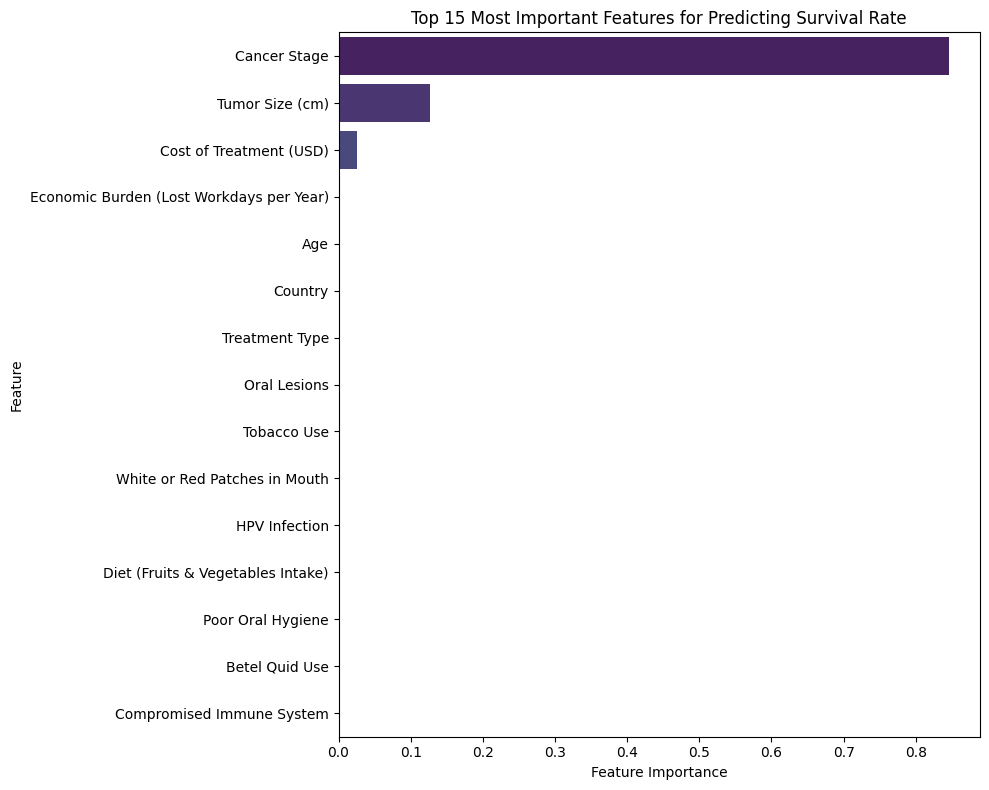

In [29]:
# 📊 Feature Importance
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=gb_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Predicting Survival Rate')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [30]:
# Step 12: Model Comparison using Accuracy
comparison = pd.DataFrame({
    "Model": ["Gradient Boosting", "Random Forest"],
    "Accuracy": [gb_accuracy, accuracy_rf]
})

comparison

,Model,Accuracy
0,Gradient Boosting,0.536063
1,Random Forest,0.535285


✅ Key Takeaways:
- Gradient Boosting accuracy: 0.5361
- Random Forest accuracy: 0.5353
- Both models show good predictive performance based on accuracy.
- Next steps could include hyperparameter tuning using GridSearchCV or RandomizedSearchCV.


In [ ]:
# Implement hyperparameter tuning for the Gradient Boosting Regressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9]
}

# Create and fit GridSearchCV
print("🔍 Starting hyperparameter tuning for Gradient Boosting Regressor...")
grid_search =
    estimator=GradientBoostingRegressor(random_state=42),
# Convert predictions to the same scale for accuracy calculation

best_gb_preds = best_gb_model.predict(X_test)
# Predict using the best model

print(f"✅ Best parameters found: {best_params}")

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# Get best parameters and model

grid_search.fit(X_train, y_train)

)
    scoring='neg_mean_squared_error'
    verbose=1,
    n_jobs=-1,
    cv=5,
    param_grid=param_grid,
    estimator=GradientBoostingRegressor(random_state=42), GridSearchCV(# Implement hyperparameter tuning for the Gradient Boosting Regressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9]
}

# Create and fit GridSearchCV
print("🔍 Starting hyperparameter tuning for Gradient Boosting Regressor...")
grid_search = GridSearchCV(